In [1]:
import numpy as np 
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
yield_data = pd.read_csv('finaldataset.csv')

In [4]:
yield_data.shape

(28242, 8)

In [5]:
yield_data.head()

,index,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [6]:
yield_data = yield_data.drop(['index'], axis=1)

In [7]:
yield_data = yield_data.rename(index=str, columns={"Item":"crop_name","Area": "Country","hg/ha_yield":"yield_value",
                                                   "average_rain_fall_mm_per_year":"avg_rainfall","pesticides_tonnes":"pesticides"})
yield_data.head()

,Country,crop_name,Year,yield_value,avg_rainfall,pesticides,avg_temp
0,Albania,Maize,1990,36613,1485,121.0,16.37
1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [8]:
yield_data.groupby('crop_name').count()

,Country,Year,yield_value,avg_rainfall,pesticides,avg_temp
crop_name,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [9]:
yield_data.describe()

,Year,yield_value,avg_rainfall,pesticides,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [10]:
yield_data['Country'].nunique()

101

In [11]:
yield_data.groupby(['Country'],sort=True)['yield_value'].sum().nlargest(10)

Country
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: yield_value, dtype: int64

In [12]:
yield_data.groupby(['crop_name','Country'],sort=True)['yield_value'].sum().nlargest(10)

crop_name       Country       
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: yield_value, dtype: int64

In [13]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df_correlation=yield_data.select_dtypes(include=[np.number]).corr()
df_correlation

,Year,yield_value,avg_rainfall,pesticides,avg_temp
Year,1.000000,0.091630,-0.003798,0.140930,0.014409
yield_value,0.091630,1.000000,0.000962,0.064085,-0.114777
avg_rainfall,-0.003798,0.000962,1.000000,0.180984,0.313040
pesticides,0.140930,0.064085,0.180984,1.000000,0.030946
avg_temp,0.014409,-0.114777,0.313040,0.030946,1.000000


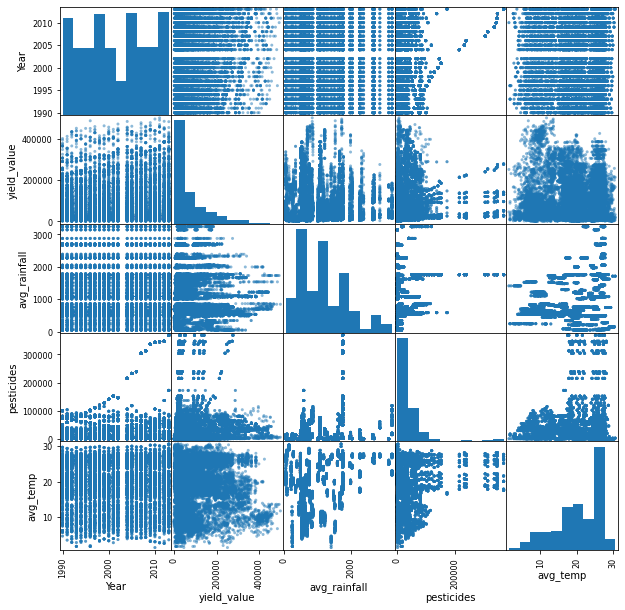

In [15]:
pd.plotting.scatter_matrix(yield_data,figsize=(10, 10))
plt.show()

Pearsons correlation: 0.092
Pearsons correlation: 0.001
Pearsons correlation: 0.064
Pearsons correlation: -0.115


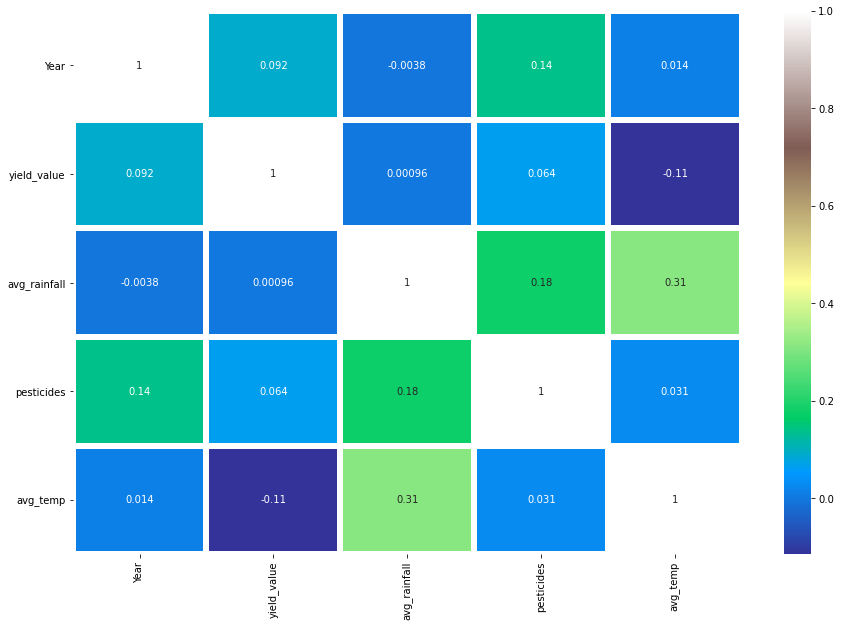

In [16]:
from scipy.stats import pearsonr
cor, _= pearsonr(yield_data['Year'], yield_data['yield_value']) 
print('Pearsons correlation: %.3f' % cor)

cor, _ = pearsonr(yield_data['avg_rainfall'], yield_data['yield_value']) 
print('Pearsons correlation: %.3f' % cor)

cor, _ = pearsonr(yield_data['pesticides'], yield_data['yield_value']) 
print('Pearsons correlation: %.3f' % cor)

cor, _ = pearsonr(yield_data['avg_temp'], yield_data['yield_value']) 
print('Pearsons correlation: %.3f' % cor)

#create a correlation heatmap
sns.heatmap(yield_data.corr(),annot=True,cmap='terrain',linewidth=5)
fg=plt.gcf() #method to make heatmap
fg.set_size_inches(15,10)

In [17]:
yield_data.head()

,Country,crop_name,Year,yield_value,avg_rainfall,pesticides,avg_temp
0,Albania,Maize,1990,36613,1485,121.0,16.37
1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
df_onehot = pd.get_dummies(yield_data, columns=['Country',"crop_name"], prefix = ['Country',"crop_name"])
fs=df_onehot.loc[:,df_onehot.columns != 'yield_value']
label=yield_data['yield_value']
fs.head()

,Year,avg_rainfall,pesticides,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,crop_name_Cassava,crop_name_Maize,crop_name_Plantains and others,crop_name_Potatoes,"crop_name_Rice, paddy",crop_name_Sorghum,crop_name_Soybeans,crop_name_Sweet potatoes,crop_name_Wheat,crop_name_Yams
0,1990,1485,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,1485,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,1485,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,1485,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,1485,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [20]:
fs = fs.drop(['Year'], axis=1)

In [21]:
fs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28242 entries, 0 to 28241
Columns: 114 entries, avg_rainfall to crop_name_Yams
dtypes: float64(2), int64(1), uint8(111)
memory usage: 3.9+ MB


In [22]:
fs.head()

,avg_rainfall,pesticides,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,crop_name_Cassava,crop_name_Maize,crop_name_Plantains and others,crop_name_Potatoes,"crop_name_Rice, paddy",crop_name_Sorghum,crop_name_Soybeans,crop_name_Sweet potatoes,crop_name_Wheat,crop_name_Yams
0,1485,121.0,16.37,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1485,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1485,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1485,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1485,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
fs=scaler.fit_transform(fs)
fs

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [24]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(fs, label, test_size=0.3, random_state=42)

In [25]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    MAE=mean_absolute_error(test_labels,y_pred)
    MSE=mean_squared_error(test_labels,y_pred)
    return([model_name,r2,MAE,MSE])

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

models = [
    GradientBoostingRegressor(),
     RandomForestRegressor(),
   DecisionTreeRegressor(),
    AdaBoostRegressor(),
    LinearRegression(),
    BaggingClassifier(KNeighborsClassifier(),max_samples=0.5,random_state=0)
]

In [27]:
model_train=list(map(compare_models,models))

In [28]:
print(*model_train, sep = "\n")

['GradientBoostingRegressor', 0.8662420211924229, 20294.0126501001, 991433827.923942]
['RandomForestRegressor', 0.9720521543159197, 5867.0752284848795, 207153546.09728622]
['DecisionTreeRegressor', 0.9598425565803785, 6110.249950824186, 297652881.750177]
['AdaBoostRegressor', 0.5716925194557708, 49101.11404343751, 3174678092.103238]
['LinearRegression', 0.7537615624071564, 29678.67260710492, 1825155545.418978]
['BaggingClassifier', 0.9158191545315255, 10889.984067036468, 623960817.9243479]


In [29]:
from sklearn import preprocessing
s0=[]
s1=[]
s2=[]
s3=[]
for i in range(len(model_train)):
    s0.append(model_train[i][0])
    s1.append(model_train[i][1])
    s2.append(model_train[i][2])
    s3.append(model_train[i][3])
#s11=(s1-min(s1))/(max(s1)-min(s1))
#s22=(s2-min(s2))/(max(s2)-min(s2))
#s33=(s3-min(s3))/(max(s3)-min(s3))
s11=np.array(s1)/max(s1)
s22=np.array(s2)/max(s2)
s33=np.array(s3)/max(s3)

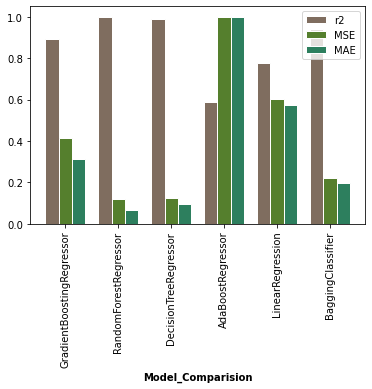

In [30]:
import numpy as np
import matplotlib.pyplot as plt
barWidth = 0.25
r1 = np.arange(len(s11))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, s11, color='#7f6d5f', width=barWidth, edgecolor='white', label='r2')
plt.bar(r2, s22, color='#557f2d', width=barWidth, edgecolor='white', label='MSE')
plt.bar(r3, s33, color='#2d7f5e', width=barWidth, edgecolor='white', label='MAE')
plt.xlabel('Model_Comparision', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(s11))],s0)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [31]:
df_onehot =df_onehot.drop(['Year'], axis=1)

In [32]:
df_onehot.head()

,yield_value,avg_rainfall,pesticides,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,crop_name_Cassava,crop_name_Maize,crop_name_Plantains and others,crop_name_Potatoes,"crop_name_Rice, paddy",crop_name_Sorghum,crop_name_Soybeans,crop_name_Sweet potatoes,crop_name_Wheat,crop_name_Yams
0,36613,1485,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,66667,1485,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,23333,1485,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,12500,1485,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7000,1485,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [33]:
df_test=pd.DataFrame(test_data,columns=df_onehot.loc[:, df_onehot.columns != 'yield_value'].columns) 
# using stack function to return a reshaped DataFrame by pivoting the columns of the current dataframe
country=df_test[[col for col in df_test.columns if 'Country' in col]].stack()[df_test[[col for col in df_test.columns if 'Country' in col]].stack()>0]
countrylist=list(pd.DataFrame(country).index.get_level_values(1))
countries=[i.split("_")[1] for i in countrylist]
item=df_test[[col for col in df_test.columns if 'crop_name' in col]].stack()[df_test[[col for col in df_test.columns if 'crop_name' in col]].stack()>0]
itemlist=list(pd.DataFrame(item).index.get_level_values(1))
items=[i.split("_")[2] for i in itemlist]

In [34]:
df_test.head()

,avg_rainfall,pesticides,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,crop_name_Cassava,crop_name_Maize,crop_name_Plantains and others,crop_name_Potatoes,"crop_name_Rice, paddy",crop_name_Sorghum,crop_name_Soybeans,crop_name_Sweet potatoes,crop_name_Wheat,crop_name_Yams
0,0.183443,0.110716,0.542078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.458451,0.000413,0.627257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.183443,0.106159,0.518228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.000000,0.224154,0.890971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.458451,0.000355,0.625213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
df_test.drop([col for col in df_test.columns if 'crop_name' in col],axis=1,inplace=True)
df_test.drop([col for col in df_test.columns if 'Country' in col],axis=1,inplace=True)
df_test.head()

,avg_rainfall,pesticides,avg_temp
0,0.183443,0.110716,0.542078
1,0.458451,0.000413,0.627257
2,0.183443,0.106159,0.518228
3,1.000000,0.224154,0.890971
4,0.458451,0.000355,0.625213


In [36]:
df_test['Country']=countries
df_test['crop_name']=items
df_test.head()

,avg_rainfall,pesticides,avg_temp,Country,crop_name
0,0.183443,0.110716,0.542078,Spain,"Rice, paddy"
1,0.458451,0.000413,0.627257,Madagascar,Wheat
2,0.183443,0.106159,0.518228,Spain,Sorghum
3,1.000000,0.224154,0.890971,Colombia,Potatoes
4,0.458451,0.000355,0.625213,Madagascar,Sweet potatoes


In [37]:
clf1=GradientBoostingRegressor()
model1=clf1.fit(train_data,train_labels)
df_test["yield_predicted"]= model1.predict(test_data)
df_test["yield_actual"]=pd.DataFrame(test_labels)["yield_value"].tolist()
test_group1=df_test.groupby("crop_name")
q1=test_group1.apply(lambda x:pd.Series(r2_score(x.yield_actual,x.yield_predicted),index=['score']))
q1.sort_values(by=['score'],ascending=False)

,score
crop_name,
Cassava,0.735649
Yams,0.718454
Potatoes,0.693339
Sweet potatoes,0.565816
Plantains and others,0.538415
Wheat,0.523807
"Rice, paddy",0.504945
Sorghum,0.466916
Maize,0.343709


In [38]:
def adjusted_r2_1(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score
s1=test_group1.apply(lambda x: pd.Series(adjusted_r2_1(x.yield_actual,x.yield_predicted,x),index=['score']))
s1.sort_values(by=['score'],ascending=False)

,score
crop_name,
Cassava,0.732215
Yams,0.708575
Potatoes,0.691450
Sweet potatoes,0.561772
Wheat,0.520486
Plantains and others,0.514591
"Rice, paddy",0.500828
Sorghum,0.462140
Maize,0.339468


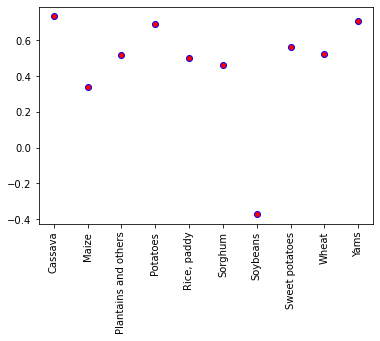

In [39]:
q2=list(s1.reset_index().crop_name.values)
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.scatter(y=s1['score'], x=q2, marker='o', c='r', edgecolor='b')

In [40]:
clf2=DecisionTreeRegressor()
model2=clf2.fit(train_data,train_labels)
df_test["yield_predicted"]= model2.predict(test_data)
df_test["yield_actual"]=pd.DataFrame(test_labels)["yield_value"].tolist()
test_group2=df_test.groupby("crop_name")
q2=test_group2.apply(lambda x:pd.Series(r2_score(x.yield_actual,x.yield_predicted),index=['score']))
q2.sort_values(by=['score'],ascending=False)

,score
crop_name,
Yams,0.929325
Cassava,0.927954
Wheat,0.923370
Potatoes,0.908299
Maize,0.894470
"Rice, paddy",0.892183
Soybeans,0.856405
Sweet potatoes,0.840221
Sorghum,0.804411


In [41]:
def adjusted_r2_2(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score
s2=test_group2.apply(lambda x: pd.Series(adjusted_r2_2(x.yield_actual,x.yield_predicted,x),index=['score']))
s2.sort_values(by=['score'],ascending=False)

,score
crop_name,
Cassava,0.927018
Yams,0.926845
Wheat,0.922835
Potatoes,0.907734
Maize,0.893788
"Rice, paddy",0.891287
Soybeans,0.855240
Sweet potatoes,0.838733
Sorghum,0.802659


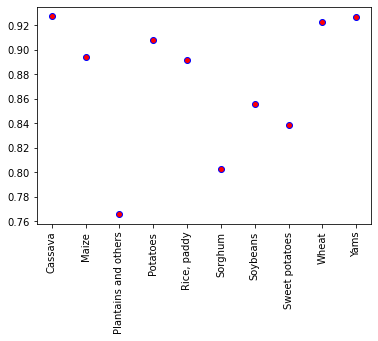

In [42]:
q2=list(s2.reset_index().crop_name.values)
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.scatter(y=s2['score'], x=q2, marker='o', c='r', edgecolor='b')

In [43]:
clf3=AdaBoostRegressor()
model3=clf3.fit(train_data,train_labels)
df_test["yield_predicted"]= model3.predict(test_data)
df_test["yield_actual"]=pd.DataFrame(test_labels)["yield_value"].tolist()
test_group3=df_test.groupby("crop_name")
q3=test_group3.apply(lambda x:pd.Series(r2_score(x.yield_actual,x.yield_predicted),index=['score']))
q3.sort_values(by=['score'],ascending=False)

,score
crop_name,
Cassava,0.669434
Potatoes,0.468834
Sweet potatoes,0.015223
Yams,-0.045935
Plantains and others,-0.196442
Maize,-3.034068
"Rice, paddy",-8.352785
Wheat,-8.656269
Sorghum,-16.000105


In [44]:
def adjusted_r2_3(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score
s3=test_group3.apply(lambda x: pd.Series(adjusted_r2_3(x.yield_actual,x.yield_predicted,x),index=['score']))
s3.sort_values(by=['score'],ascending=False)

,score
crop_name,
Cassava,0.665141
Potatoes,0.465562
Sweet potatoes,0.006052
Yams,-0.082634
Plantains and others,-0.258194
Maize,-3.060137
"Rice, paddy",-8.430563
Wheat,-8.723619
Sorghum,-16.152402


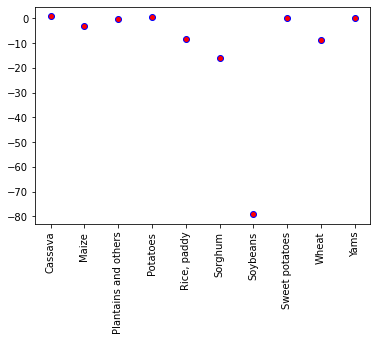

In [45]:
q2=list(s3.reset_index().crop_name.values)
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.scatter(y=s3['score'], x=q2, marker='o', c='r', edgecolor='b')

In [46]:
clf4=LinearRegression()
model4=clf4.fit(train_data,train_labels)
df_test["yield_predicted"]= model4.predict(test_data)
df_test["yield_actual"]=pd.DataFrame(test_labels)["yield_value"].tolist()
test_group4=df_test.groupby("crop_name")
q4=test_group4.apply(lambda x:pd.Series(r2_score(x.yield_actual,x.yield_predicted),index=['score']))
q4.sort_values(by=['score'],ascending=False)

,score
crop_name,
Yams,0.594337
Potatoes,0.541263
Sweet potatoes,0.412006
Plantains and others,0.351517
Cassava,0.256928
"Rice, paddy",-0.014016
Maize,-0.016735
Sorghum,-0.993499
Wheat,-1.208238


In [47]:
def adjusted_r2_4(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score
s4=test_group4.apply(lambda x: pd.Series(adjusted_r2_4(x.yield_actual,x.yield_predicted,x),index=['score']))
s4.sort_values(by=['score'],ascending=False)

,score
crop_name,
Yams,0.580103
Potatoes,0.538438
Sweet potatoes,0.406530
Plantains and others,0.318047
Cassava,0.247277
"Rice, paddy",-0.022449
Maize,-0.023305
Sorghum,-1.011358
Wheat,-1.223640


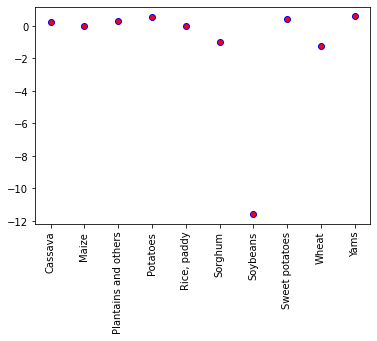

In [48]:
q2=list(s4.reset_index().crop_name.values)
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.scatter(y=s4['score'], x=q2, marker='o', c='r', edgecolor='b')

In [49]:
clf5=RandomForestRegressor(max_depth=10)
model5=clf5.fit(train_data,train_labels)
df_test["yield_predicted"]= model5.predict(test_data)
df_test["yield_actual"]=pd.DataFrame(test_labels)["yield_value"].tolist()
test_group5=df_test.groupby("crop_name")
q5=test_group5.apply(lambda x:pd.Series(r2_score(x.yield_actual,x.yield_predicted),index=['score']))
q5.sort_values(by=['score'],ascending=False)

,score
crop_name,
Yams,0.951984
Cassava,0.927785
Sweet potatoes,0.839649
Potatoes,0.819867
Plantains and others,0.801978
Maize,0.610894
"Rice, paddy",0.560772
Sorghum,0.543065
Wheat,0.540447


In [50]:
def adjusted_r2_5(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score
s5=test_group5.apply(lambda x: pd.Series(adjusted_r2_5(x.yield_actual,x.yield_predicted,x),index=['score']))
s5.sort_values(by=['score'],ascending=False)

,score
crop_name,
Yams,0.950299
Cassava,0.926847
Sweet potatoes,0.838156
Potatoes,0.818758
Plantains and others,0.791757
Maize,0.608380
"Rice, paddy",0.557119
Sorghum,0.538971
Wheat,0.537241


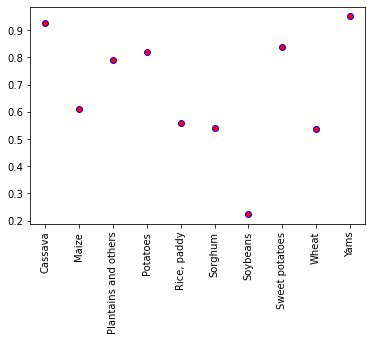

In [51]:
q2=list(s5.reset_index().crop_name.values)
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.scatter(y=s5['score'], x=q2, marker='o', c='r', edgecolor='b')

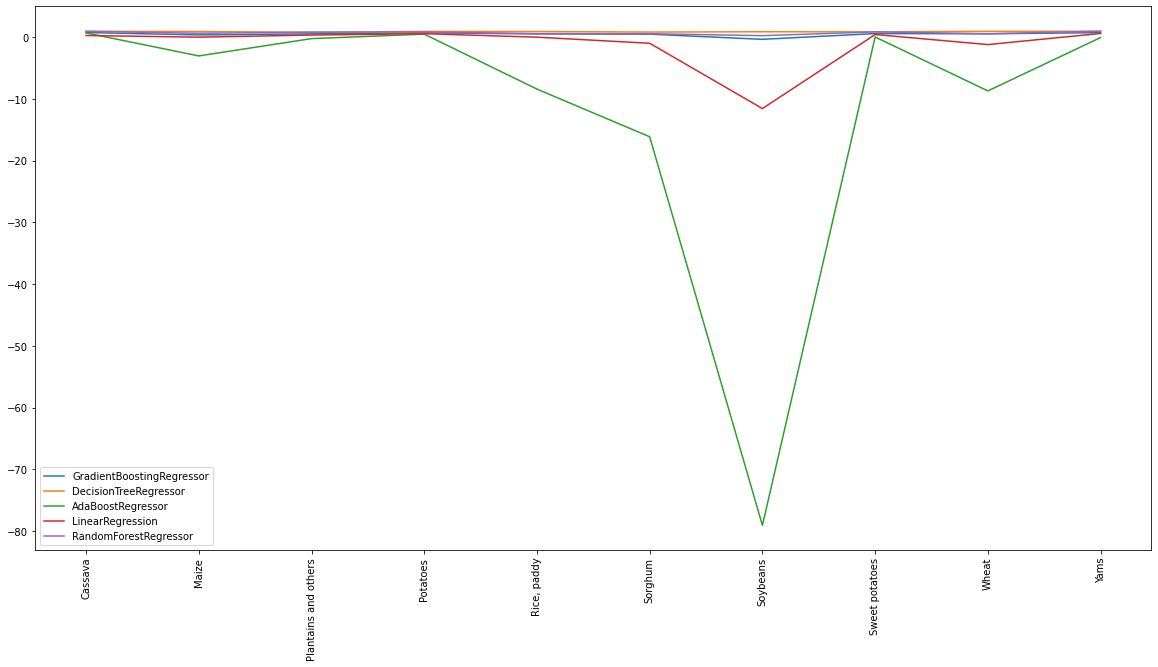

In [52]:
fig=plt.figure(figsize=(20,10))
plt.plot(s1,label="GradientBoostingRegressor")
plt.plot(s2,label="DecisionTreeRegressor")
plt.plot(s3,label="AdaBoostRegressor")
plt.plot(s4,label="LinearRegression")
plt.plot(s5,label="RandomForestRegressor")
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Comparing the combination of models
* AdaBoostRegressor with DecisionTreeRegressor

In [53]:
from sklearn.ensemble import AdaBoostRegressor
res=AdaBoostRegressor(DecisionTreeRegressor())
m1=res.fit(train_data,train_labels)
df_test["yield_predicted"]= m1.predict(test_data)
df_test["yield_actual"]=pd.DataFrame(test_labels)["yield_value"].tolist()
test_group6=df_test.groupby("crop_name")
q6=test_group6.apply(lambda x:pd.Series(r2_score(x.yield_actual,x.yield_predicted),index=['score']))
q6.sort_values(by=['score'],ascending=False)

,score
crop_name,
Yams,0.956987
Wheat,0.949778
Cassava,0.937559
Potatoes,0.929132
Maize,0.918946
"Rice, paddy",0.918247
Sweet potatoes,0.885161
Soybeans,0.874381
Sorghum,0.873969


In [54]:
def adjusted_r2_6(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score
s6=test_group6.apply(lambda x: pd.Series(adjusted_r2_6(x.yield_actual,x.yield_predicted,x),index=['score']))
s6.sort_values(by=['score'],ascending=False)

,score
crop_name,
Yams,0.955478
Wheat,0.949428
Cassava,0.936748
Potatoes,0.928695
Maize,0.918423
"Rice, paddy",0.917567
Sweet potatoes,0.884091
Soybeans,0.873362
Sorghum,0.872840


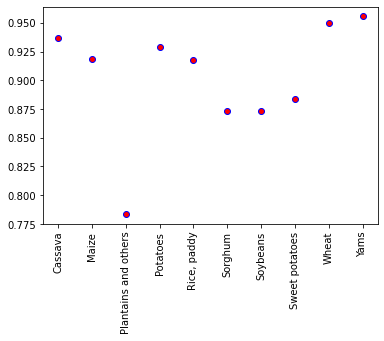

In [55]:
q2=list(s6.reset_index().crop_name.values)
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.scatter(y=s6['score'], x=q2, marker='o', c='r', edgecolor='b')

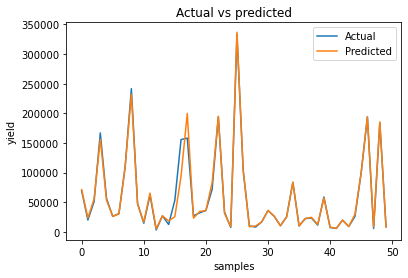

In [56]:
plt.plot(df_test.yield_actual[:50],label='Actual')
plt.plot(df_test.yield_predicted[:50],label='Predicted')
plt.title("Actual vs predicted")
plt.xlabel("samples")
plt.ylabel("yield")
plt.legend()
plt.show()

* Bagging Classifier with KNN

In [57]:
res1=BaggingClassifier(KNeighborsClassifier(),max_samples=0.5,random_state=0)
m2=res1.fit(train_data,train_labels)
df_test["yield_predicted"]= m2.predict(test_data)
df_test["yield_actual"]=pd.DataFrame(test_labels)["yield_value"].tolist()
test_group7=df_test.groupby("crop_name")
q7=test_group7.apply(lambda x:pd.Series(r2_score(x.yield_actual,x.yield_predicted),index=['score']))
q7.sort_values(by=['score'],ascending=False)

,score
crop_name,
Wheat,0.890961
Yams,0.868178
Cassava,0.845211
"Rice, paddy",0.830579
Potatoes,0.826329
Soybeans,0.721907
Plantains and others,0.686962
Sweet potatoes,0.650407
Maize,0.479160


In [58]:
def adjusted_r2_7(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score
s7=test_group7.apply(lambda x: pd.Series(adjusted_r2_7(x.yield_actual,x.yield_predicted,x),index=['score']))
s7.sort_values(by=['score'],ascending=False)

,score
crop_name,
Wheat,0.890201
Yams,0.863552
Cassava,0.843200
"Rice, paddy",0.829170
Potatoes,0.825259
Soybeans,0.719651
Plantains and others,0.670805
Sweet potatoes,0.647152
Maize,0.475795


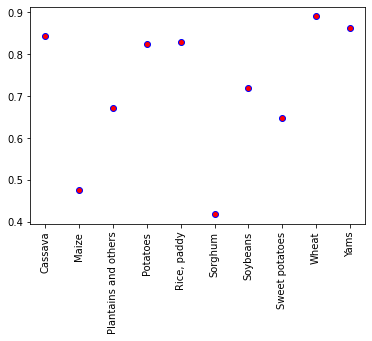

In [59]:
q2=list(s7.reset_index().crop_name.values)
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.scatter(y=s7['score'], x=q2, marker='o', c='r', edgecolor='b')

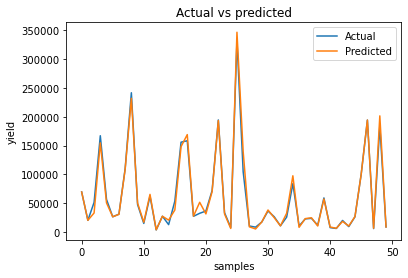

In [60]:
plt.plot(df_test.yield_actual[:50],label='Actual')
plt.plot(df_test.yield_predicted[:50],label='Predicted')
plt.title("Actual vs predicted")
plt.xlabel("samples")
plt.ylabel("yield")
plt.legend()
plt.show()

* AdaBoostRegressor with RandomForestRegressor

In [61]:
from sklearn.ensemble import AdaBoostRegressor
res2=AdaBoostRegressor(RandomForestRegressor())
m3=res2.fit(train_data,train_labels)
df_test["yield_predicted"]= m3.predict(test_data)
df_test["yield_actual"]=pd.DataFrame(test_labels)["yield_value"].tolist()
test_group8=df_test.groupby("crop_name")
q8=test_group8.apply(lambda x:pd.Series(r2_score(x.yield_actual,x.yield_predicted),index=['score']))
q8.sort_values(by=['score'],ascending=False)

,score
crop_name,
Yams,0.949532
Cassava,0.943709
Potatoes,0.934051
Maize,0.895921
Sweet potatoes,0.894409
"Rice, paddy",0.892503
Wheat,0.890274
Plantains and others,0.845797
Sorghum,0.832772


In [62]:
def adjusted_r2_8(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score
s8=test_group8.apply(lambda x: pd.Series(adjusted_r2_8(x.yield_actual,x.yield_predicted,x),index=['score']))
s8.sort_values(by=['score'],ascending=False)

,score
crop_name,
Yams,0.947761
Cassava,0.942978
Potatoes,0.933645
Maize,0.895248
Sweet potatoes,0.893425
"Rice, paddy",0.891609
Wheat,0.889508
Plantains and others,0.837838
Sorghum,0.831274


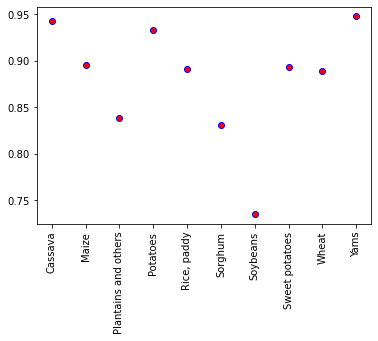

In [63]:
q2=list(s8.reset_index().crop_name.values)
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.scatter(y=s8['score'], x=q2, marker='o', c='r', edgecolor='b')

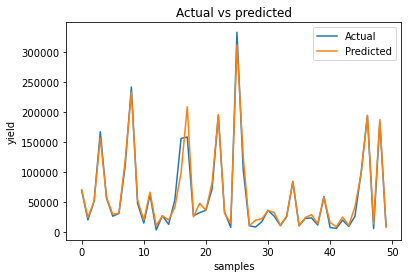

In [64]:
plt.plot(df_test.yield_actual[:50],label='Actual')
plt.plot(df_test.yield_predicted[:50],label='Predicted')
plt.title("Actual vs predicted")
plt.xlabel("samples")
plt.ylabel("yield")
plt.legend()
plt.show()

* DecisionTreeRegressor with RandomForestRegressor

In [65]:
max_depth_range = list(range(1, 25))
accuracy = []
for depth in max_depth_range:   
    clf11 = DecisionTreeRegressor(max_depth = depth,random_state = 0)
    clf11.fit(train_data,train_labels)
    score = clf11.score(test_data,test_labels)
    accuracy.append(score)
print(accuracy)

[0.3910321844525194, 0.51233418926378, 0.6739363644710917, 0.7413467612573929, 0.7942353456830746, 0.8242476387945554, 0.8548190841988216, 0.8814229063670128, 0.9036613916958353, 0.9221645677285936, 0.9340437047780943, 0.9409934062746185, 0.9457079448971271, 0.9491941638767551, 0.9536871328330105, 0.9560877254850597, 0.9578485570468962, 0.9598453699912103, 0.960922015325987, 0.9609292880752591, 0.9622694931415541, 0.9622308767988084, 0.9608970717753059, 0.9611080950800629]


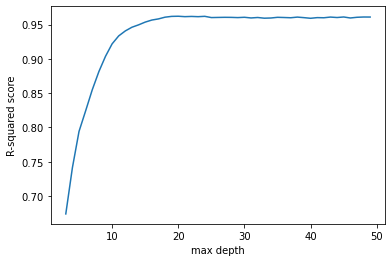

In [66]:
qscore=[]
a=[]
for i in range(3,50,1):
    a.append(i)
    regressor = DecisionTreeRegressor(max_depth=i)
    regressor.fit(train_data,train_labels)
    y_pred = regressor.predict(test_data)
    qscore.append(r2_score(test_labels,y_pred))


plt.plot(a,qscore)
plt.xlabel('max depth')
plt.ylabel('R-squared score')
plt.show()

In [67]:
res3=RandomForestRegressor(n_estimators=100,max_depth=10)
m4=res3.fit(train_data,train_labels)
df_test["yield_predicted"]= m4.predict(test_data)
df_test["yield_actual"]=pd.DataFrame(test_labels)["yield_value"].tolist()
test_group9=df_test.groupby("crop_name")
q9=test_group9.apply(lambda x:pd.Series(r2_score(x.yield_actual,x.yield_predicted),index=['score']))
q9.sort_values(by=['score'],ascending=False)

,score
crop_name,
Yams,0.950089
Cassava,0.935777
Potatoes,0.836340
Sweet potatoes,0.831902
Plantains and others,0.815176
Maize,0.636707
"Rice, paddy",0.583623
Wheat,0.564432
Sorghum,0.535580


In [68]:
def adjusted_r2_9(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score
s9=test_group9.apply(lambda x: pd.Series(adjusted_r2_9(x.yield_actual,x.yield_predicted,x),index=['score']))
s9.sort_values(by=['score'],ascending=False)

,score
crop_name,
Yams,0.948338
Cassava,0.934943
Potatoes,0.835332
Sweet potatoes,0.830336
Plantains and others,0.805636
Maize,0.634359
"Rice, paddy",0.580160
Wheat,0.561394
Sorghum,0.531420


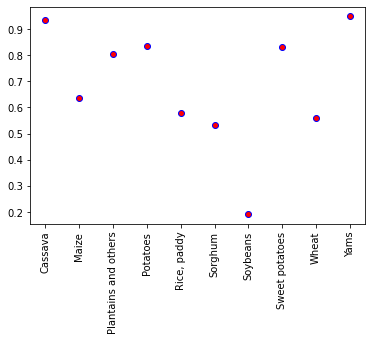

In [69]:
q2=list(s9.reset_index().crop_name.values)
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.scatter(y=s9['score'], x=q2, marker='o', c='r', edgecolor='b')

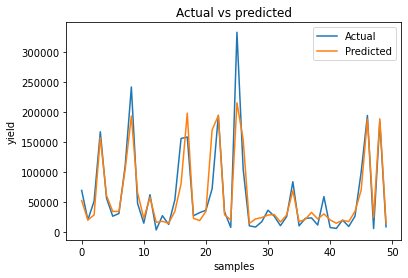

In [70]:
plt.plot(df_test.yield_actual[:50],label='Actual')
plt.plot(df_test.yield_predicted[:50],label='Predicted')
plt.title("Actual vs predicted")
plt.xlabel("samples")
plt.ylabel("yield")
plt.legend()
plt.show()

* LinearRegression with DecisionTreeRegressor

In [71]:
from sklearn.linear_model import LinearRegression
res4=LinearRegression(DecisionTreeRegressor())
m5=res4.fit(train_data,train_labels)
df_test["yield_predicted"]=m5.predict(test_data)
df_test["yield_actual"]=pd.DataFrame(test_labels)["yield_value"].tolist()
test_group10=df_test.groupby("crop_name")
q10=test_group10.apply(lambda x:pd.Series(r2_score(x.yield_actual,x.yield_predicted),index=['score']))
q10.sort_values(by=['score'],ascending=False)

,score
crop_name,
Yams,0.594337
Potatoes,0.541263
Sweet potatoes,0.412006
Plantains and others,0.351517
Cassava,0.256928
"Rice, paddy",-0.014016
Maize,-0.016735
Sorghum,-0.993499
Wheat,-1.208238


In [72]:
def adjusted_r2_10(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score
s10=test_group10.apply(lambda x: pd.Series(adjusted_r2_10(x.yield_actual,x.yield_predicted,x),index=['score']))
s10.sort_values(by=['score'],ascending=False)

,score
crop_name,
Yams,0.580103
Potatoes,0.538438
Sweet potatoes,0.406530
Plantains and others,0.318047
Cassava,0.247277
"Rice, paddy",-0.022449
Maize,-0.023305
Sorghum,-1.011358
Wheat,-1.223640


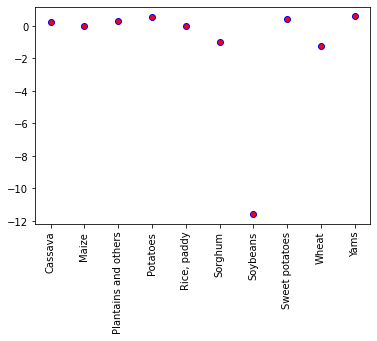

In [73]:
q2=list(s10.reset_index().crop_name.values)
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.scatter(y=s10['score'], x=q2, marker='o', c='r', edgecolor='b')

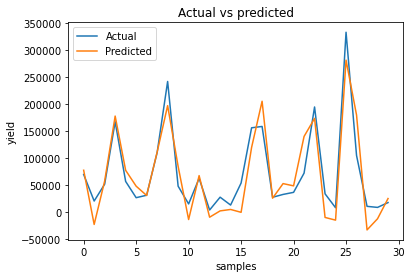

In [74]:
plt.plot(df_test.yield_actual[:30],label='Actual')
plt.plot(df_test.yield_predicted[:30],label='Predicted')
plt.title("Actual vs predicted")
plt.xlabel("samples")
plt.ylabel("yield")
plt.legend()
plt.show()

In [ ]:
* GradientBoosting with DecisionTreeRegressor

In [ ]:
res5=GradientBoostingRegressor(n_estimators=200, max_depth=25, random_state=0)
m6=res5.fit(train_data,train_labels)
df_test["yield_predicted"]= m6.predict(test_data)
df_test["yield_actual"]=pd.DataFrame(test_labels)["yield_value"].tolist()
test_group11=df_test.groupby("crop_name")
q11=test_group11.apply(lambda x:pd.Series(r2_score(x.yield_actual,x.yield_predicted),index=['score']))
q11.sort_values(by=['score'],ascending=False)

In [76]:
def adjusted_r2_11(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score
s11=test_group11.apply(lambda x: pd.Series(adjusted_r2_11(x.yield_actual,x.yield_predicted,x),index=['score']))
s11.sort_values(by=['score'],ascending=False)

,score
crop_name,
Cassava,0.933187
Wheat,0.930227
Yams,0.929351
Potatoes,0.911782
"Rice, paddy",0.904979
Maize,0.902831
Soybeans,0.868367
Sweet potatoes,0.844225
Sorghum,0.811065


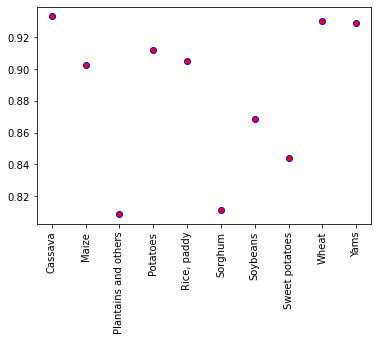

In [77]:
q2=list(s11.reset_index().crop_name.values)
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.scatter(y=s11['score'], x=q2, marker='o', c='r', edgecolor='b')

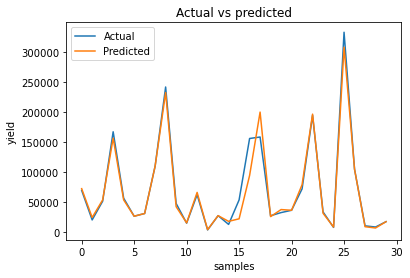

In [78]:
plt.plot(df_test.yield_actual[:30],label='Actual')
plt.plot(df_test.yield_predicted[:30],label='Predicted')
plt.title("Actual vs predicted")
plt.xlabel("samples")
plt.ylabel("yield")
plt.legend()
plt.show()

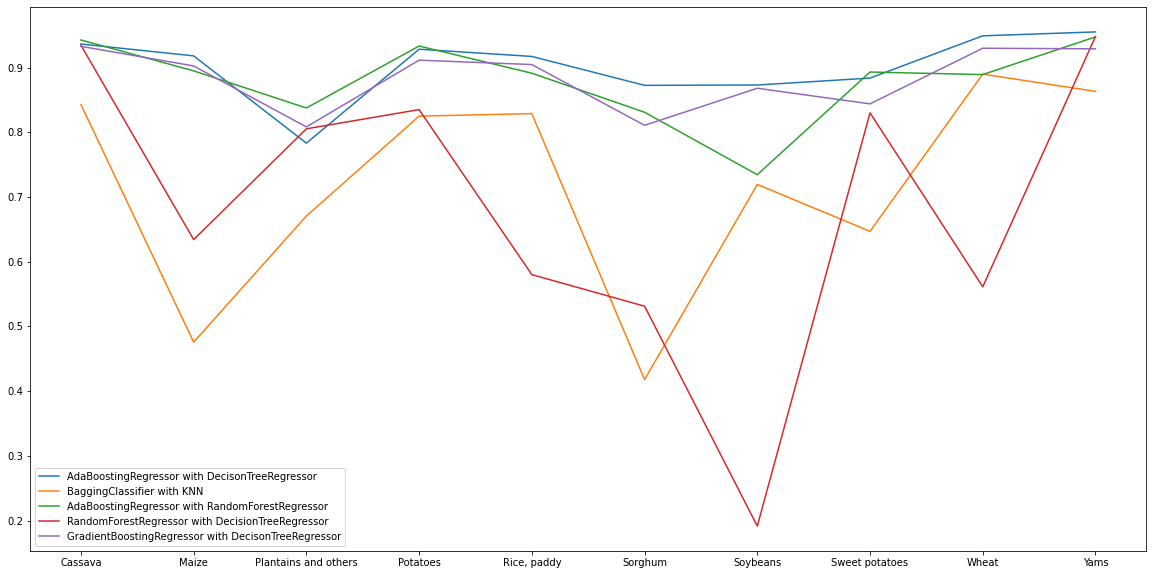

In [79]:
fig=plt.figure(figsize=(20,10))
plt.plot(s6,label="AdaBoostingRegressor with DecisonTreeRegressor")
plt.plot(s7,label="BaggingClassifier with KNN")
plt.plot(s8,label="AdaBoostingRegressor with RandomForestRegressor")
plt.plot(s9,label="RandomForestRegressor with DecisionTreeRegressor ")
#plt.plot(s10,label="LinearRegression with DecisionTreeRegressor")
plt.plot(s11,label="GradientBoostingRegressor with DecisonTreeRegressor")
plt.legend()
plt.show()

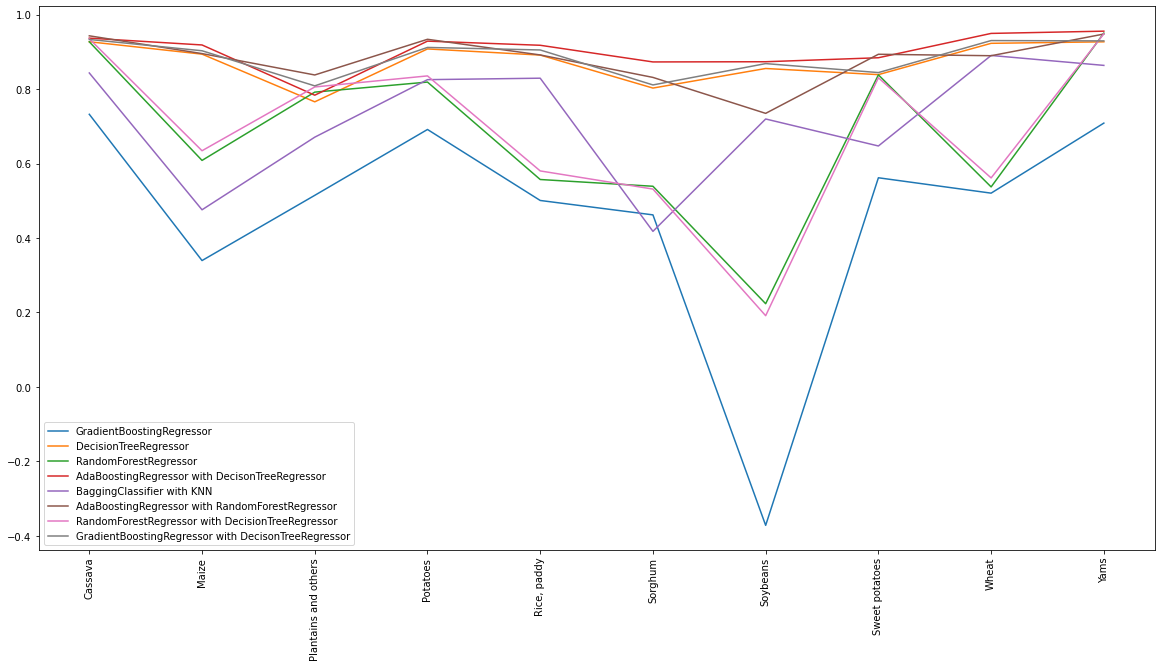

In [80]:
fig=plt.figure(figsize=(20,10))
plt.plot(s1,label="GradientBoostingRegressor")
plt.plot(s2,label="DecisionTreeRegressor")
#plt.plot(s3,label="AdaBoostRegressor")
#plt.plot(s4,label="LinearRegression")
plt.plot(s5,label="RandomForestRegressor")
plt.plot(s6,label="AdaBoostingRegressor with DecisonTreeRegressor")
plt.plot(s7,label="BaggingClassifier with KNN")
plt.plot(s8,label="AdaBoostingRegressor with RandomForestRegressor")
plt.plot(s9,label="RandomForestRegressor with DecisionTreeRegressor ")
#plt.plot(s10,label="LinearRegression with DecisionTreeRegressor")
plt.plot(s11,label="GradientBoostingRegressor with DecisonTreeRegressor")
plt.xticks(rotation=90)
plt.legend()
plt.show()